In [27]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
from keras.utils import to_categorical

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [43]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [44]:
x_train = x_train.reshape(60000,28,28,1).astype(float) #NumImages,  RowSize, ColumnSize, Channels
x_test = x_test.reshape(10000,28,28,1).astype(float)

### Exploring Dataset

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

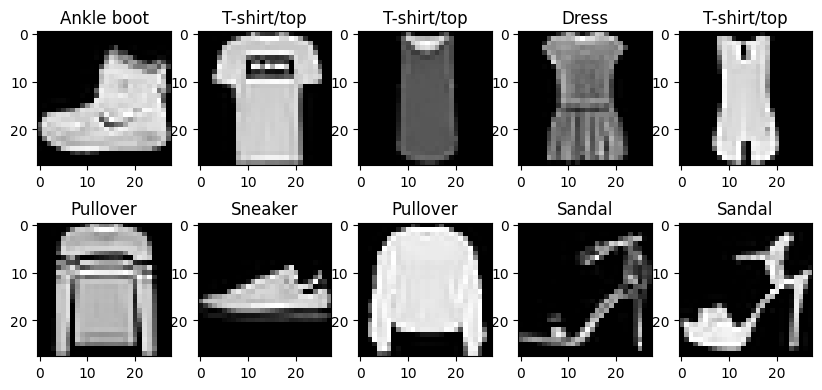

In [46]:
plt.figure(figsize=(10,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

### Model Building

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

In [70]:
model = Sequential()
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1, 1),padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1, 1),padding='valid'))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [71]:
model.compile(loss='categorical_crossentropy',
             optimizer = Adam(learning_rate=0.01),
             metrics = ['accuracy'])

In [72]:
model.fit(x=x_train,
            y=y_train_ohe,
            batch_size=1000,
            validation_data=(x_test, y_test_ohe),
            epochs = 15)

Epoch 1/15
60/60 [==============================] - 11s 184ms/step - loss: 3.9813 - accuracy: 0.7059 - val_loss: 0.5859 - val_accuracy: 0.7892
Epoch 2/15
60/60 [==============================] - 10s 172ms/step - loss: 0.5023 - accuracy: 0.8218 - val_loss: 0.5166 - val_accuracy: 0.8154
Epoch 3/15
60/60 [==============================] - 11s 187ms/step - loss: 0.4506 - accuracy: 0.8392 - val_loss: 0.4728 - val_accuracy: 0.8344
Epoch 4/15
60/60 [==============================] - 11s 188ms/step - loss: 0.4140 - accuracy: 0.8498 - val_loss: 0.4603 - val_accuracy: 0.8399
Epoch 5/15
60/60 [==============================] - 11s 176ms/step - loss: 0.3894 - accuracy: 0.8588 - val_loss: 0.4551 - val_accuracy: 0.8334
Epoch 6/15
60/60 [==============================] - 10s 173ms/step - loss: 0.3784 - accuracy: 0.8605 - val_loss: 0.4274 - val_accuracy: 0.8508
Epoch 7/15
60/60 [==============================] - 11s 179ms/step - loss: 0.3588 - accuracy: 0.8687 - val_loss: 0.4118 - val_accuracy: 0.8554

In [73]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

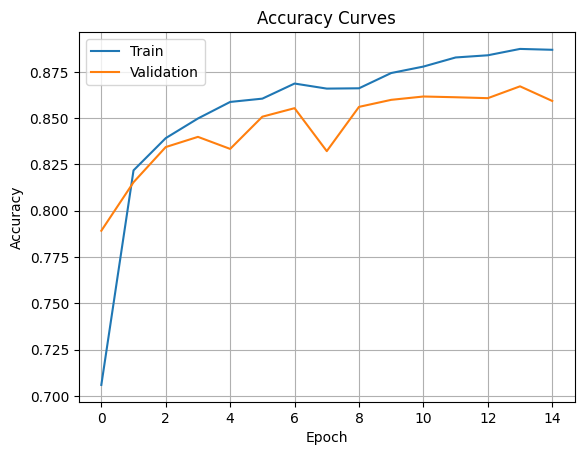

In [74]:
plt.plot(train_accuracy, label='Train')
plt.plot(validation_accuracy,label='Validation')
# plt.ylim(0,1.1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curves")
plt.legend()
plt.grid()
plt.show()

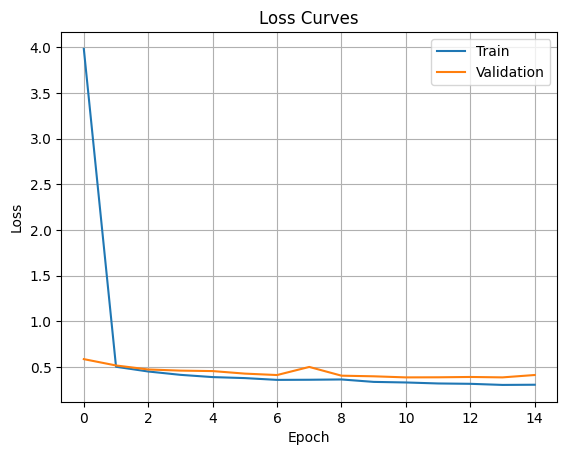

In [75]:
plt.plot(train_loss, label='Train')
plt.plot(val_loss,label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.grid()
plt.show()